In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
books = pd.read_csv("BX_Books.csv", delimiter=";", encoding = "ISO-8859-1", error_bad_lines=False, warn_bad_lines=False)
users = pd.read_csv("BX-Users.csv", delimiter=";", encoding = "ISO-8859-1", error_bad_lines=False, warn_bad_lines=False)
ratings = pd.read_csv("BX-Book-Ratings.csv", delimiter=";", encoding = "ISO-8859-1", error_bad_lines=False, warn_bad_lines=False)

In [3]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [4]:
# Drop the unnecessary columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [5]:
# Checke for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [6]:
books.dropna(axis=0, inplace=True)
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [7]:
# Check outlier for column Year-Of-Publication
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [8]:
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

# Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

# Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271063 entries, 0 to 271062
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271063 non-null  object
 1   Book-Title           271063 non-null  object
 2   Book-Author          271063 non-null  object
 3   Year-Of-Publication  271063 non-null  int64 
 4   Publisher            271063 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


In [11]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [12]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users.dropna(axis=0, inplace=True)
users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [15]:
# Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0, 228

In [16]:
filtering = users[users['Age'] < 10]
users.drop(filtering.index, inplace=True)

filtering = users[users['Age'] >90]
users.drop(filtering.index, inplace=True)

In [17]:
# Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


In [18]:
users.dropna(axis=0, inplace=True)
users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [19]:
# Drop the unnessary column
users.drop(['Location'], inplace=True, axis=1)
users.head()

,User-ID,Age
1,2,18.0
3,4,17.0
5,6,61.0
9,10,26.0
10,11,14.0


In [20]:
# Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166597 entries, 0 to 166596
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  166597 non-null  int64  
 1   Age      166597 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.5 MB


In [22]:
users.head()

,User-ID,Age
0,2,18.0
1,4,17.0
2,6,61.0
3,10,26.0
4,11,14.0


In [23]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [24]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [26]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Text(0.5, 1.0, 'Num of books by an author (Top 15)')

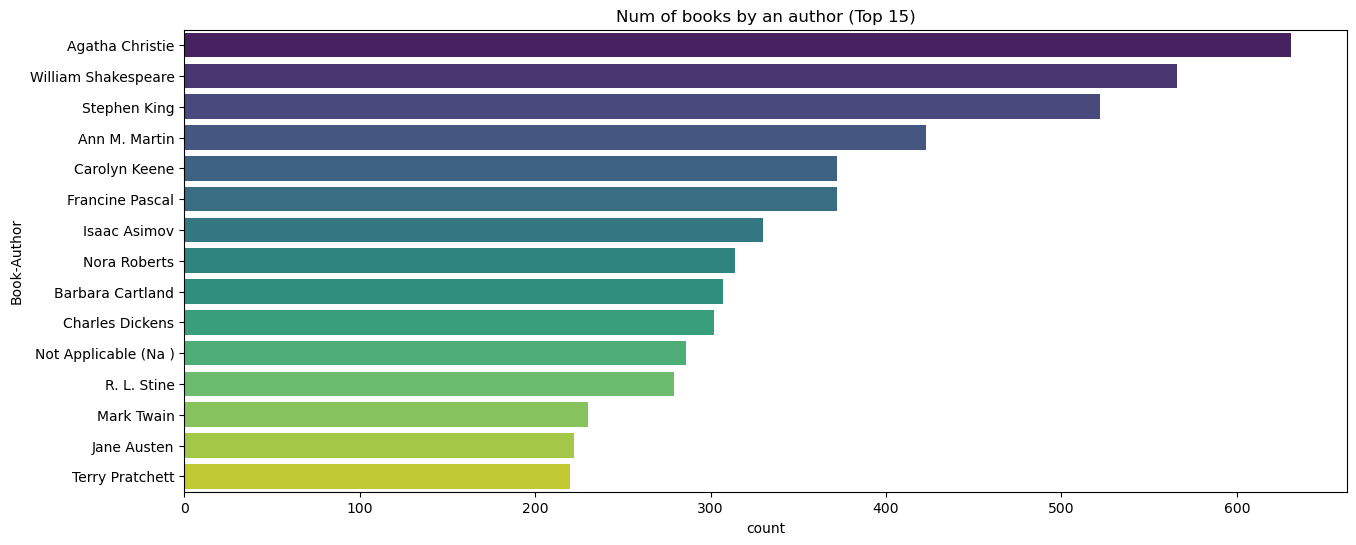

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:15], palette='viridis')
plt.title("Num of books by an author (Top 15)")

Text(0.5, 1.0, 'Num of books published by a publisher (Top 15)')

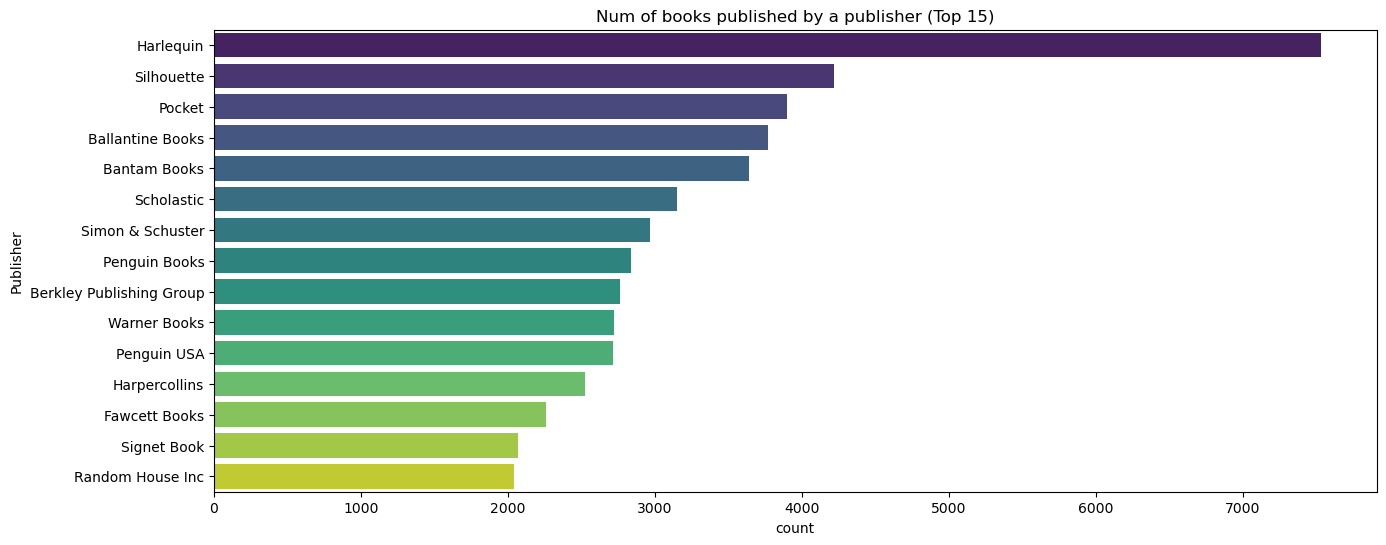

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15], palette='viridis')
plt.title("Num of books published by a publisher (Top 15)")

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

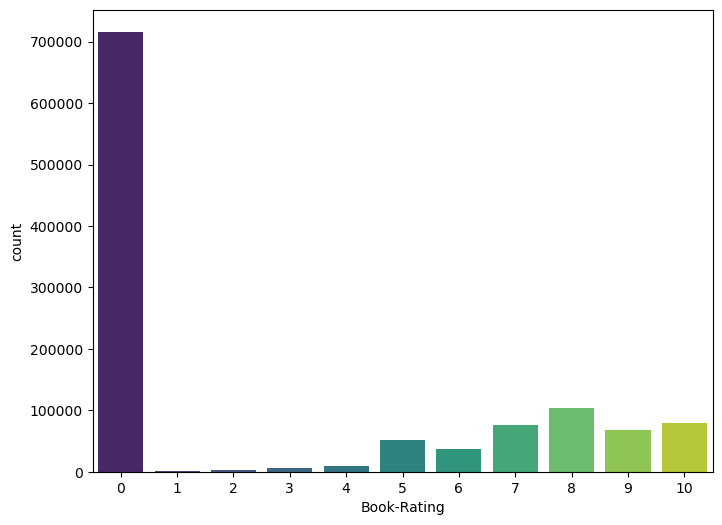

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings, palette='viridis')

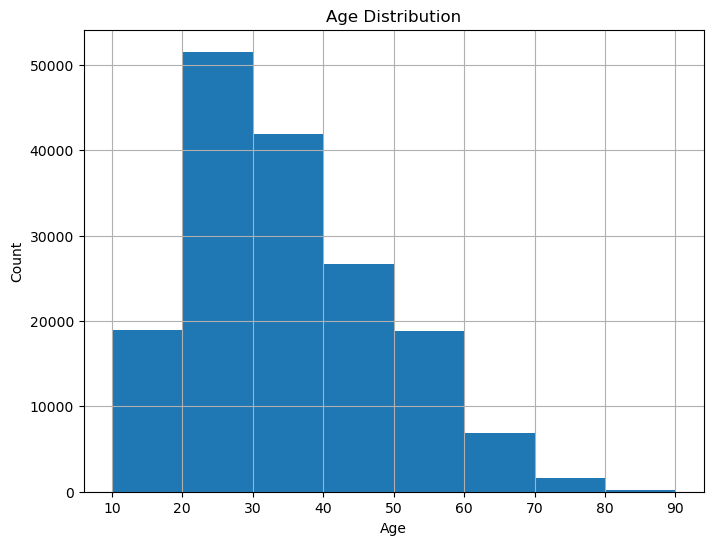

In [30]:
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [31]:
# Merge three dataset for books, ratings, users data
Preprocessed_data = pd.merge(books, ratings, on='ISBN', how='inner')
Preprocessed_data = pd.merge(Preprocessed_data, users, on='User-ID', how='inner')
Preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745186 entries, 0 to 745185
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 745186 non-null  object 
 1   Book-Title           745186 non-null  object 
 2   Book-Author          745186 non-null  object 
 3   Year-Of-Publication  745186 non-null  int64  
 4   Publisher            745186 non-null  object 
 5   User-ID              745186 non-null  int64  
 6   Book-Rating          745186 non-null  int64  
 7   Age                  745186 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 51.2+ MB


In [32]:
# Create a DataFrame with the count of ratings for each unique book title
df = pd.DataFrame(Preprocessed_data['Book-Title'].value_counts())

# Duplicate the 'Book-Title' column as an index, create a new column 'Total-Ratings', and reset the index
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

# Merge the count of ratings DataFrame with Preprocessed_data
df = Preprocessed_data.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')

# Drop unnecessary columns ('Year-Of-Publication', 'Publisher', 'Age')
df = df.drop(['Year-Of-Publication','Publisher','Age'], axis=1)

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Filter out books with total ratings below the popularity threshold
popularity_threshold = 50
popular_book = train_df[train_df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [33]:
# Create an empty DataFrame for collaborative filtering
collaborative_df = pd.DataFrame()
collaborative_df['ISBN'] = popular_book['ISBN']
collaborative_df['Book-Rating'] = popular_book['Book-Rating']
collaborative_df['User-ID'] = popular_book['User-ID']

# Group the DataFrame by 'ISBN' and select 'User-ID' and 'Book-Rating' columns
collaborative_df = collaborative_df[['User-ID', 'Book-Rating']].groupby(collaborative_df['ISBN'])


In [34]:
# Given book name and a rating number
bookName = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"
number = 5

# Initialize an empty list to store dictionaries, and index mapping variables
listOfDictionaries = []
indexMap = {}
reverseIndexMap = {}
ptr = 0

# Iterate over groups in collaborative_df
for groupKey in collaborative_df.groups.keys():
    # Create a temporary dictionary to store user ratings for each group
    tempDict = {}
    
    # Get the group (subset of collaborative_df) based on the groupKey
    groupDF = collaborative_df.get_group(groupKey)
    
    # Fill the temporary dictionary with user ratings
    for i in range(0, len(groupDF)):
        tempDict[groupDF.iloc[i, 0]] = groupDF.iloc[i, 1]
    
    # Update index mappings
    indexMap[ptr] = groupKey
    reverseIndexMap[groupKey] = ptr
    ptr = ptr + 1
    
    listOfDictionaries.append(tempDict)

# Convert the list of dictionaries into a sparse matrix
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictionaries)

# Compute pairwise cosine similarity between the vectors
pairwiseSimilarity = cosine_similarity(vector)


In [35]:
# Print the book title for a given bookID
def printBookDetails(bookID):
    print(df[df['ISBN'] == bookID]['Book-Title'].values[0])

# Collaborative_Filtering(user-item) function
def collaborative_Filtering(ISBN):
    collaborative = []  # Initialize a list to store collaborative recommendations
    row = reverseIndexMap[ISBN]  # Get the row index for the given ISBN
    
    mn = 0  # Counter for the number of recommendations
    similar = []  # List to store similar books
    
    # Iterate over the sorted indices of pairwise similarity
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
        # Check if the book title is not already in the 'similar' list
        if df[df['ISBN'] == indexMap[i]]['Book-Title'].values[0] not in similar:
            # Check if the number of recommendations has reached the specified limit
            if mn >= number:
                break
            mn += 1
            printBookDetails(indexMap[i])
            collaborative.append(df[df['ISBN'] == indexMap[i]]['Book-Title'].values[0])
            similar.append(df[df['ISBN'] == indexMap[i]]['Book-Title'].values[0])
    
    return collaborative

# Example usage:
# Replace 'example_ISBN' with an actual ISBN from your data
# collaborative_books = collaborative_Filtering('example_ISBN')



In [36]:
title = list(df['Book-Title'])
isbn = list(df['ISBN'])
print("Input Book:")
printBookDetails(isbn[title.index(bookName)])

print("\nRecommended Books:\n")
collaborative = collaborative_Filtering(isbn[title.index(bookName)])

Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Recommended Books:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Goblet of Fire (Book 4)
Fried Green Tomatoes at the Whistle Stop Cafe
The Mists of Avalon


In [37]:
popularity_threshold = 80

# Filter books based on the new popularity threshold and sampling_20% of the popular books
popular_book = train_df[train_df['Total-Ratings'] >= popularity_threshold].sample(frac=0.3, random_state=42)
popular_book = popular_book.reset_index(drop=True)

# fit_transform TF-IDF vectorization on book titles
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])

# Convert TF-IDF matrix to a normalized data
normalized_df = tfidf_matrix.astype(np.float32)

# Calculate cosine similarities between book titles
cosine_similarities = cosine_similarity(normalized_df, normalized_df)


In [38]:
tf.vocabulary_

{'heaven': 934,
 'earth': 628,
 'sisters': 1850,
 'island': 1034,
 'trilogy': 2106,
 'heaven earth': 935,
 'earth sisters': 631,
 'sisters island': 1851,
 'island trilogy': 1035,
 'pillars': 1529,
 'pillars earth': 1530,
 'mulberry': 1352,
 'tree': 2100,
 'mulberry tree': 1353,
 'hobbit': 955,
 'enchanting': 654,
 'prelude': 1584,
 'lord': 1196,
 'rings': 1692,
 'hobbit enchanting': 956,
 'enchanting prelude': 655,
 'prelude lord': 1585,
 'lord rings': 1198,
 'malice': 1233,
 'perfect': 1507,
 'storm': 1942,
 'true': 2114,
 'story': 1945,
 'men': 1270,
 'sea': 1771,
 'perfect storm': 1508,
 'storm true': 1944,
 'true story': 2118,
 'story men': 1947,
 'men sea': 1273,
 'ahab': 46,
 'wife': 2241,
 'star': 1919,
 'gazer': 819,
 'novel': 1424,
 'ahab wife': 47,
 'wife star': 2243,
 'star gazer': 1920,
 'gazer novel': 820,
 'peril': 1509,
 'angela': 80,
 'ashes': 108,
 'angela ashes': 81,
 'pilot': 1531,
 'pilot wife': 1532,
 'wife novel': 2242,
 'handmaid': 915,
 'tale': 2007,
 'handmaid 

In [39]:
# Conten_based_recommend function
def content_based_Recommendations(bookName, number, popular_book, cosine_similarities):
    # Get the ISBN for the input bookName
    isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop=True).iloc[0]['ISBN']
    content = []  # Initialize a list to store recommended book titles
    
    # Find the index of the input book in the popular_book
    idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
    
    # Get the indices of books similar to the input book based on cosine similarities
    similar_indices = cosine_similarities[idx].argsort()[::-1]
    
    similar_items = []  # Initialize a list to store similar book titles
    
    # Iterate through similar indices to find recommended books
    for i in similar_indices:
        # Check if the book title is not the input book, not already in the list, and the list is not full
        if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < number:
            similar_items.append(popular_book['Book-Title'][i])
            content.append(popular_book['Book-Title'][i])
    
    return content

# Example usage:
content_recommendations = content_based_Recommendations(bookName, number, popular_book, cosine_similarities)

print(f"Input Book:\n{bookName}\n")
print("Recommended Books:\n")
print("\n".join(content_recommendations))


Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Recommended Books:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)


In [40]:
content_based_Recommendations("Wild Animus", number, popular_book, cosine_similarities)

['Call of the Wild',
 'Into the Wild',
 'The Burden of Proof',
 'Seabiscuit',
 'A Walk to Remember']

In [46]:
content_based_Recommendations("", number, popular_book, cosine_similarities)

IndexError: list index out of range

In [42]:
df

,ISBN,Book-Title,Book-Author,User-ID,Book-Rating,Total-Ratings
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0,2
1,0002005018,Clara Callan,Richard Bruce Wright,11400,0,7
2,0786868716,The Five People You Meet in Heaven,Mitch Albom,11400,9,357
3,0151008116,Life of Pi,Yann Martel,11400,6,510
4,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,11400,0,338
...,...,...,...,...,...,...
745181,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,246590,6,1
745182,087004124X,Anthem,Ayn Rand,259589,8,49
745183,158243123X,A Student of Weather,Elizabeth Hay,259591,8,8
745184,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,259614,10,1


In [43]:
collaborative_Filtering(isbn[title.index("Wild Animus")])

The Hobbit
Chicken Soup for the Teenage Soul (Chicken Soup for the Soul)
The Andromeda Strain
Cause of Death
The Silmarillion


['The Hobbit',
 'Chicken Soup for the Teenage Soul (Chicken Soup for the Soul)',
 'The Andromeda Strain',
 'Cause of Death',
 'The Silmarillion']

In [45]:
collaborative_Filtering(isbn[title.index("FIRST WIVES CLUB")])

The Gift
The Secret Garden
Fever
The Jury
After Dark


['The Gift', 'The Secret Garden', 'Fever', 'The Jury', 'After Dark']